# Correlation

for two random variables $X_{i}, X_{j}$

$$Corr(X_i, X_j) = \frac{Cov(X_i, X_j)}{\sigma_i \sigma_j}$$

It is widely known that correlation can be easily flawed.
- In time series, correlation structure changes easily.  
- Most data do not meet stationary, iid conditions   

Also, changing "frequency" shows different correlation behavior.

# 1. Get data
    - load data from local database

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# customary path
path_1m = r"C:\Users\creat\Desktop\Sandbox\YData\1m"

In [3]:
# symbols used in this notebook
# US-listed sector ETFs
symbols_dict = {
    'XLK': 'Technology',
    'XLF': 'Financials',
    'XLE': 'Energy',
    'XLV': 'Healthcare',
    'XLY': 'Consumer Cyclicals',
    'XLI': 'Industrials',
    'XLB': 'Basic Materials',
    'XLU': 'Utilities',
    'XLP': 'Consumer Non-cyclicals',
}

In [5]:
# set data

data_dict = {}
timeframes = ['1m', '1d']

for tf in timeframes:
    data_dict.setdefault(tf, []) # not 'list', but []
    
    path = r"C:\Users\creat\Desktop\Sandbox\YData\{}".format(tf)
    listdir = os.listdir(path)

    for fname in listdir:
        path_fname = '{}\{}'.format(path, fname)
        data = pd.read_pickle(path_fname)
        data_dict[tf].append(data)


In [6]:
# data of each frequency is stored in keys, with the format of 'list'
# list in dictionary contains pd.DataFrame. Each frame represents an ETF

data_dict.keys() 
# data_dict.values()

dict_keys(['1m', '1d'])

In [7]:
data.info()  # changing volume to type 'int' is trivial in this case.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2514 entries, 2011-03-24 09:30:00 to 2021-03-19 09:30:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   XLY_low     2514 non-null   float64
 1   XLY_volume  2514 non-null   int64  
 2   XLY_open    2514 non-null   float64
 3   XLY_close   2514 non-null   float64
 4   XLY_high    2514 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 117.8 KB


In [8]:
data.head(5) # pre-market included, so that volume = 0 for '1m'

,XLY_low,XLY_volume,XLY_open,XLY_close,XLY_high
2011-03-24 09:30:00,38.349998,5014600,38.369999,38.750000,38.860001
2011-03-25 09:30:00,38.740002,3540700,38.880001,38.820000,39.080002
2011-03-28 09:30:00,38.410000,9778000,38.930000,38.419998,38.930000
2011-03-29 09:30:00,38.340000,6115000,38.410000,38.770000,38.779999
2011-03-30 09:30:00,38.900002,7024700,39.020000,39.189999,39.250000


In [11]:
# concat data into one frame
total_df = pd.concat(data_dict['1m'], axis=1)

In [12]:
total_df.head(5)

,XLB_low,XLB_high,XLB_open,XLB_volume,XLB_close,XLE_low,XLE_high,XLE_open,XLE_volume,XLE_close,...,XLV_low,XLV_open,XLV_close,XLV_high,XLV_volume,XLY_low,XLY_high,XLY_open,XLY_volume,XLY_close
2021-03-15 04:00:00,NaN,NaN,NaN,NaN,NaN,53.71,53.71,53.71,0.0,53.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-15 04:02:00,NaN,NaN,NaN,NaN,NaN,53.71,53.71,53.71,0.0,53.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-15 04:11:00,NaN,NaN,NaN,NaN,NaN,54.00,54.00,54.00,0.0,54.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-15 04:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-15 04:18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. preprocessing
    - exclude pre & post market
    - check NAs, outliers
    - now working boxplot part, and then check NA.

In [13]:
# use only 'close' price (for 1m data)
close_columns = total_df.columns.str.contains('close')
total_df = total_df.loc[:, close_columns]
total_df.head(5)

,XLB_close,XLE_close,XLF_close,XLI_close,XLK_close,XLP_close,XLU_close,XLV_close,XLY_close
2021-03-15 04:00:00,NaN,53.71,34.99,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-15 04:02:00,NaN,53.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-15 04:11:00,NaN,54.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-15 04:17:00,NaN,NaN,34.94,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-15 04:18:00,NaN,NaN,34.95,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# exclude pre & post market. use only US regular market-hour
regular_market_idx = total_df.index.indexer_between_time("09:30", "16:00")
total_df = total_df.iloc[regular_market_idx, :]

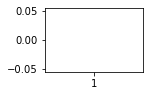

In [15]:
# check boxplot (price)
fig = plt.figure()

for column in total_df.columns:
    data = total_df.loc[:, column].values
    ax = fig.add_subplot(3, 3, 1)
    ax.boxplot(data)
    break

In [16]:
total_df

,XLB_close,XLE_close,XLF_close,XLI_close,XLK_close,XLP_close,XLU_close,XLV_close,XLY_close
2021-03-15 09:30:00,78.540001,53.509998,34.830002,97.309998,131.449997,66.360001,62.639999,114.440002,166.990005
2021-03-15 09:31:00,78.550003,53.459999,34.810001,97.290001,131.419998,66.379997,62.639999,114.610001,167.009995
2021-03-15 09:32:00,78.510002,53.259998,34.750000,97.220001,131.289993,66.444504,62.770000,114.620003,166.979996
2021-03-15 09:33:00,78.500000,53.520000,34.779999,97.209999,131.240005,66.400002,62.849998,114.589996,166.929993
2021-03-15 09:34:00,78.500000,53.439999,34.770000,97.160004,131.289993,66.389999,62.810001,114.610001,167.190002
...,...,...,...,...,...,...,...,...,...
2021-03-19 15:56:00,78.150002,49.570000,34.209999,96.614998,129.914993,66.415001,62.119999,115.099998,166.649994
2021-03-19 15:57:00,78.129997,49.549999,34.244999,96.650002,129.830002,66.480003,62.209999,115.180000,166.740005
2021-03-19 15:58:00,78.074997,49.490002,34.244999,96.559998,129.664993,66.379997,62.160000,115.059998,166.570007
2021-03-19 15:59:00,77.970001,49.509998,34.209999,96.500000,129.589996,66.339996,62.189999,115.019997,166.389999


In [17]:
# check NA
total_df.isna().sum()

XLB_close    5
XLE_close    5
XLF_close    5
XLI_close    5
XLK_close    5
XLP_close    6
XLU_close    5
XLV_close    6
XLY_close    6
dtype: int64

# 3. Correlation
    - .corr() makes correlation matrix easily.
    - The matrix can be intuitively visualized by sns.heatmap()

In [18]:
total_df.corr()

,XLB_close,XLE_close,XLF_close,XLI_close,XLK_close,XLP_close,XLU_close,XLV_close,XLY_close
XLB_close,1.000000,0.161761,0.872877,0.891490,0.046716,-0.434480,-0.326333,0.418121,0.501259
XLE_close,0.161761,1.000000,0.009627,-0.041980,0.541824,-0.010948,0.630045,-0.084497,0.660435
XLF_close,0.872877,0.009627,1.000000,0.925581,-0.233732,-0.695304,-0.547325,0.179551,0.204530
XLI_close,0.891490,-0.041980,0.925581,1.000000,-0.273875,-0.625039,-0.589710,0.321565,0.243021
XLK_close,0.046716,0.541824,-0.233732,-0.273875,1.000000,0.545692,0.654912,0.287036,0.772718
XLP_close,-0.434480,-0.010948,-0.695304,-0.625039,0.545692,1.000000,0.552593,0.270806,0.133411
XLU_close,-0.326333,0.630045,-0.547325,-0.589710,0.654912,0.552593,1.000000,0.135451,0.401042
XLV_close,0.418121,-0.084497,0.179551,0.321565,0.287036,0.270806,0.135451,1.000000,0.440480
XLY_close,0.501259,0.660435,0.204530,0.243021,0.772718,0.133411,0.401042,0.440480,1.000000
